In [ ]:
"""!pip install numpy
!pip install networkx
!pip install matplotlib
!pip install pandas
!pip install tqdm
!pip install powerlaw"""

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import networkx as nx

from utils_graphs import *

In [2]:
datasets_folder = "datasets/"
graphs_folder = "graphs/"
measures_folder = "measures/"
plots_folder = "plots/"

# Horas críticas identificadas en el artículo de Beiró and Gandica et al.
HORA_CRITICA_NAT = "429624"
HORA_CRITICA_9N = "437037"

# Análisis Exploratorio de Datos (EDA) y creación de grafos

In [4]:
df_nat = read_data("nat", datasets_folder=datasets_folder)
df_9n = read_data("9n", datasets_folder=datasets_folder)

## Número de usuarios y hashtags únicos por hora

In [5]:
print("No al tarifazo: número de usuarios únicos:", df_nat["user"].unique().shape[0], ", hashtags únicos:", df_nat["hashtag"].unique().shape[0], ", horas únicas:", df_nat["hour"].unique().shape[0], "en el conjunto de datos.\n")
print("9n: número de usuarios únicos:", df_9n["user"].unique().shape[0], ", hashtags únicos:", df_9n["hashtag"].unique().shape[0], ", horas únicas::", df_9n["hour"].unique().shape[0], "en el conjunto de datos.")

No al tarifazo: número de usuarios únicos: 9670 , hashtags únicos: 23398 , horas únicas: 260 en el conjunto de datos.

9n: número de usuarios únicos: 8022 , hashtags únicos: 18717 , horas únicas:: 97 en el conjunto de datos.


In [6]:
# Añado el numero de usuarios y hashtags únicos a sendos arrays

hour_nat = np.sort(df_nat["hour"].unique())
hour_9n = np.sort(df_9n["hour"].unique())

num_user_nat = []
num_hashtag_nat = []
for hour in hour_nat:
    df_hour_nat = df_nat[df_nat["hour"] == hour]
    num_user_nat.append(len(df_hour_nat["user"].unique()))
    num_hashtag_nat.append(len(df_hour_nat["hashtag"].unique()))

num_user_9n = []
num_hashtag_9n = []
for hour in np.sort(df_9n["hour"].unique()):
    df_hour_9n = df_9n[df_9n["hour"] == hour]
    num_user_9n.append(len(df_hour_9n["user"].unique()))
    num_hashtag_9n.append(len(df_hour_9n["hashtag"].unique()))

In [7]:
# Convierto la hora a formato año, mes, día, hora
hour_nat_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_nat]
hour_9n_dt = [datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H") for hour in hour_9n]

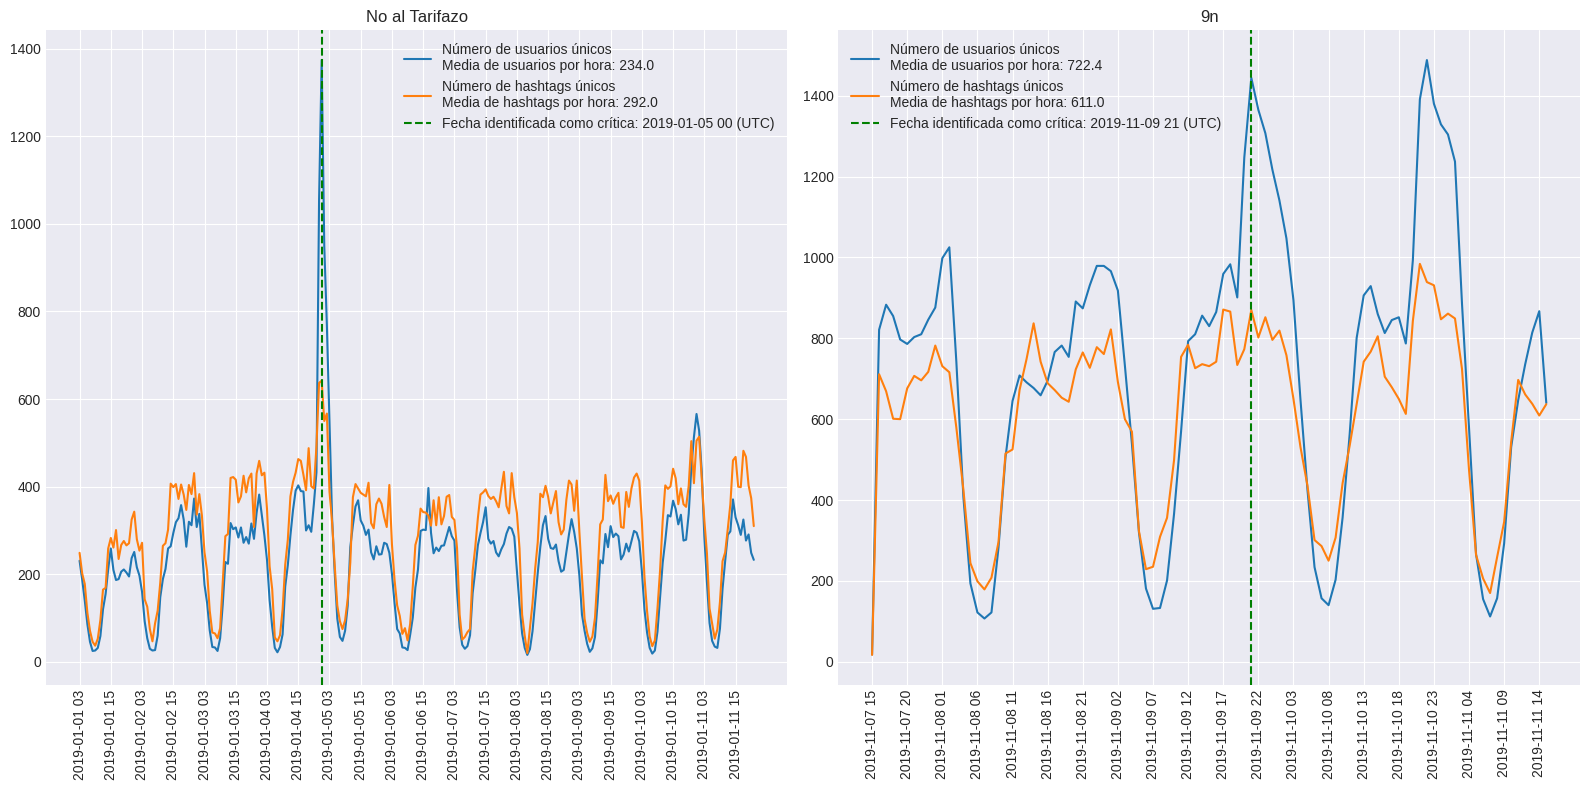

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)

ax1.set_title("No al Tarifazo")
ax1.plot(hour_nat_dt, num_user_nat, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_nat), 1)))
ax1.plot(hour_nat_dt, num_hashtag_nat, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_nat), 1)))
# Marcamos la hora marcada como crítica en Beiró & Gandica et al.
ax1.axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
ax1.set_xticks(hour_nat_dt[::12])
ax1.set_xticklabels(hour_nat_dt[::12])
ax1.tick_params(axis='x', rotation=90)
ax1.legend()

ax2.set_title("9n")
ax2.plot(hour_9n_dt, num_user_9n, label="Número de usuarios únicos\nMedia de usuarios por hora: " +str(round(np.mean(num_user_9n), 1)))
ax2.plot(hour_9n_dt, num_hashtag_9n, label="Número de hashtags únicos\nMedia de hashtags por hora: " +str(round(np.mean(num_hashtag_9n), 1)))
# Marcamos la hora marcada como crítica en Beiró & Gandica et al.
ax2.axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")) +' (UTC)')
ax2.set_xticks(hour_9n_dt[::5])
ax2.set_xticklabels(hour_9n_dt[::5])
ax2.tick_params(axis='x', rotation=90)
ax2.legend()

plt.tight_layout()
plt.savefig(plots_folder + "num_unique_users_hashtags.png")
plt.show()


## Creación de redes por hora

In [ ]:
# Creamos grafos de la manifestación del 9n
manifestacion = "9n"

create_graphs("hashtag", "user", df_9n, manifestacion, graphs_folder=graphs_folder)

create_graphs("user", "hashtag", df_9n, manifestacion, graphs_folder=graphs_folder)

create_bipartite_graph(df_9n, manifestacion, graphs_folder=graphs_folder)

# Creamos grafos de la manifestación del No al Tarifazo
manifestacion = "nat"

create_graphs("hashtag", "user", df_nat, manifestacion, graphs_folder=graphs_folder)

create_graphs("user", "hashtag", df_nat, manifestacion, graphs_folder=graphs_folder)

create_bipartite_graph(df_nat, manifestacion, graphs_folder=graphs_folder)

## Número  de nodos y aristas en los grafos generados por hora

In [9]:
# Se leen los grafos creados para cada hora y se almacena el número de nodos y de aristas de cada uno
num_edges_nat = []
num_nodes_nat = []
for hour in hour_nat:
    G = nx.read_gexf(graphs_folder + "nodes_hashtag/nat/" + str(hour) + '.gexf')
    num_edges_nat.append(G.number_of_edges())
    num_nodes_nat.append(G.number_of_nodes())

num_edges_9n = []
num_nodes_9n = []
for hour in hour_9n:
    G = nx.read_gexf(graphs_folder + "nodes_hashtag/9n/" + str(hour) + '.gexf')
    num_edges_9n.append(G.number_of_edges())
    num_nodes_9n.append(G.number_of_nodes())

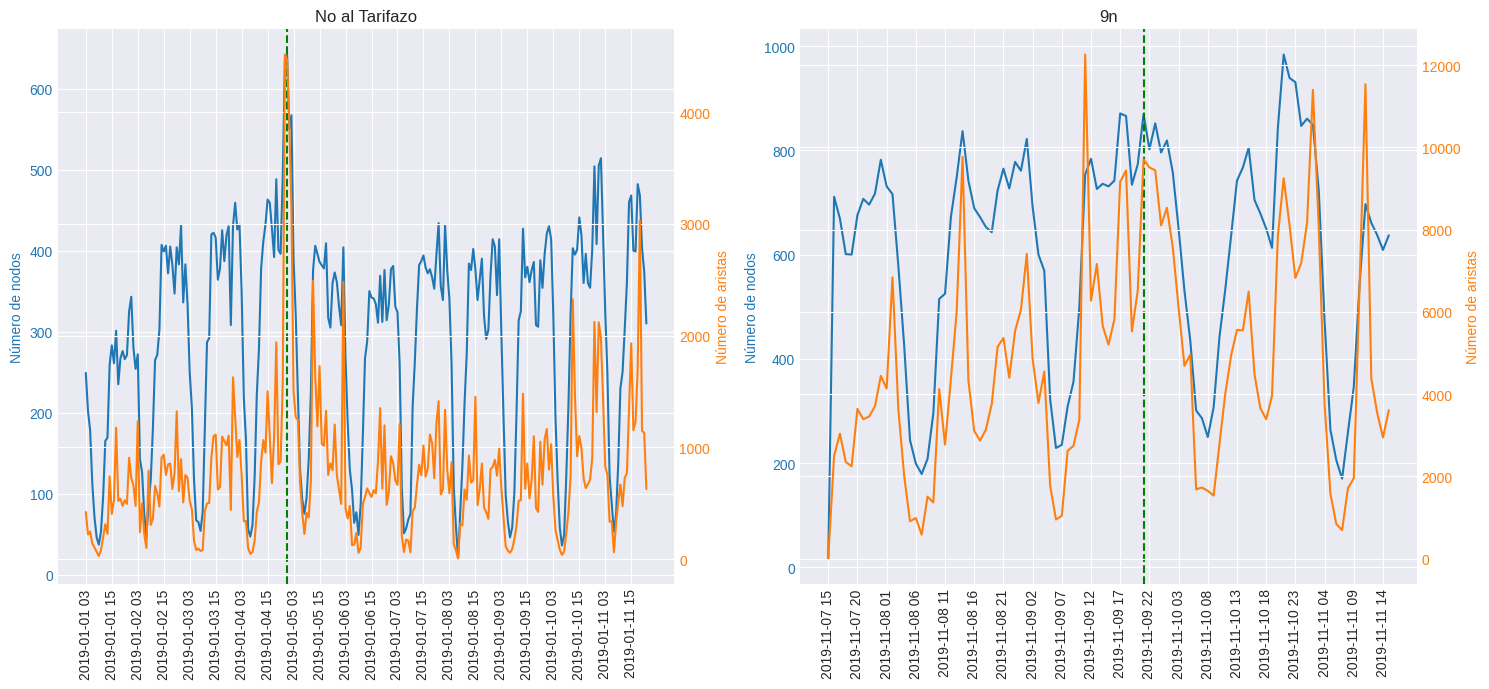

In [10]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(hour_nat_dt, num_nodes_nat, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_nat), 1)))
ax1.set_ylabel('Número de nodos', color='#1f77b4')
ax1.tick_params(axis='y', labelcolor='#1f77b4')
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
ax1.axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax1b = ax1.twinx()
ax1b.plot(hour_nat_dt, num_edges_nat, '#ff7f0e', label="Número de aristas \nMedia de aristas por hora: " +str(round(np.mean(num_edges_nat), 1)))
ax1b.set_ylabel('Número de aristas', color='#ff7f0e')
ax1b.tick_params(axis='y', labelcolor='#ff7f0e')
ax1.set_title('No al Tarifazo')
ax1.set_xticks(hour_nat_dt[::12])
ax1.set_xticklabels(hour_nat_dt[::12])
ax1.tick_params(axis='x', rotation=90)

ax2.plot(hour_9n_dt, num_nodes_9n, '#1f77b4', label="Número de nodos\nMedia de nodos por hora: " +str(round(np.mean(num_nodes_9n), 1)))
ax2.set_ylabel('Número de nodos', color='#1f77b4')
ax2.tick_params(axis='y', labelcolor='#1f77b4')
# Marcamos la hora marcada como crítica en Beiró & Yérali et al.
ax2.axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--", label="Fecha identificada como crítica: " + str(datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H")))

ax2b = ax2.twinx()
ax2b.plot(hour_9n_dt, num_edges_9n, '#ff7f0e', label="Número de aristas\nMedia de aristas por hora: " +str(round(np.mean(num_edges_9n), 1)))
ax2b.set_ylabel('Número de aristas', color='#ff7f0e')
ax2b.tick_params(axis='y', labelcolor='#ff7f0e')
ax2.set_title('9n')

ax2.set_xticks(hour_9n_dt[::5])
ax2.set_xticklabels(hour_9n_dt[::5])
ax2.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.savefig(plots_folder + "num_nodes_edges.png")
plt.show()

## Coeficiente de anidamiento y modularidad por ventana horaria

In [11]:
# Manifestación: 9n
# Hashtags como nodos
hour_sort_9n_h, mod_sort_9n_h, nest_sort_9n_h = get_clust_nest_coefficient("9n", "h", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Usuarios como nodos
hour_sort_9n_u, mod_sort_9n_u, nest_sort_9n_u = get_clust_nest_coefficient("9n", "u", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Redes bipartitas
hour_sort_9n_b, mod_sort_9n_b, nest_sort_9n_b = get_clust_nest_coefficient("9n", "b", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Manifestación: No al tarifazo
# Hashtags como nodos
hour_sort_nat_h, mod_sort_nat_h, nest_sort_nat_h = get_clust_nest_coefficient("nat", "h", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Usuarios como nodos
hour_sort_nat_u, mod_sort_nat_u, nest_sort_nat_u = get_clust_nest_coefficient("nat", "u", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)

# Redes bipartitas
hour_sort_nat_b, mod_sort_nat_b, nest_sort_nat_b = get_clust_nest_coefficient("nat", "b", measures_foler=measures_folder, datasets_foler=datasets_folder, graphs_folder=graphs_folder)


Calculando el anidamiento y modularidad de 9n con criterio: h


100%|██████████| 97/97 [00:00<00:00, 222321.03it/s]

Calculando el anidamiento y modularidad de 9n con criterio: u



100%|██████████| 97/97 [00:00<00:00, 541741.00it/s]


Calculando el anidamiento y modularidad de 9n con criterio: b


100%|██████████| 97/97 [00:00<00:00, 293117.79it/s]


Calculando el anidamiento y modularidad de nat con criterio: h


100%|██████████| 260/260 [00:00<00:00, 1100422.85it/s]


Calculando el anidamiento y modularidad de nat con criterio: u


100%|██████████| 260/260 [00:00<00:00, 428663.14it/s]


Calculando el anidamiento y modularidad de nat con criterio: b


100%|██████████| 260/260 [00:00<00:00, 695927.91it/s]


In [12]:
# Convertimos el formato horario para el gráfico
dt_sort_arr_nat=[]
for hour in hour_sort_nat_b:
    dt_sort_arr_nat.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

dt_sort_arr_9n=[]
for hour in hour_sort_9n_b:
    dt_sort_arr_9n.append(datetime.datetime.fromtimestamp(int(hour)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"))

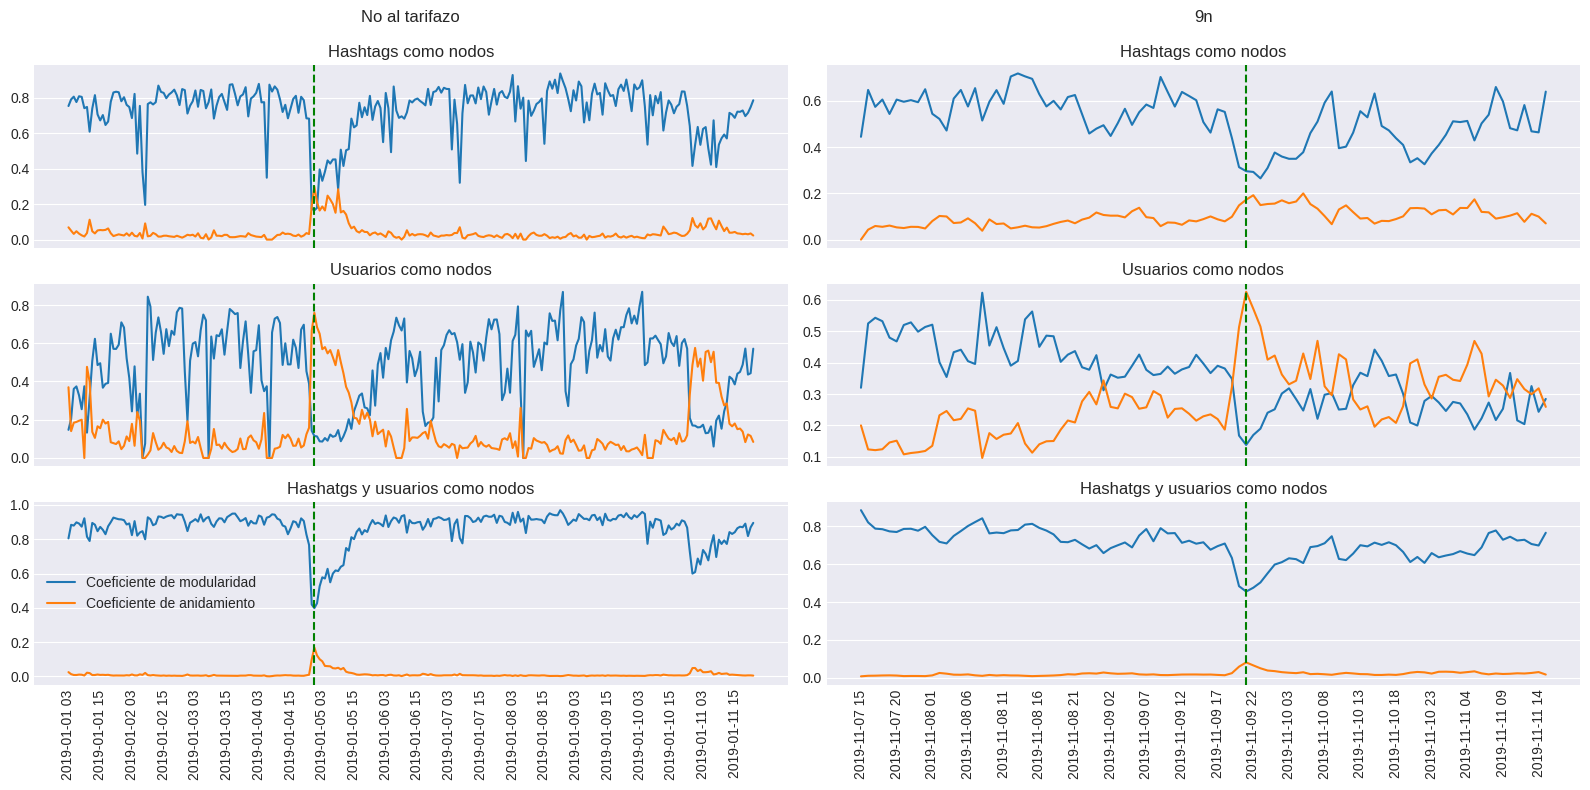

In [13]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, axs = plt.subplots(3, 2)
fig.set_size_inches(16,8)

# No al Tarifazo
# Hashtags como nodos

axs[0, 0].plot(dt_sort_arr_nat, mod_sort_nat_h)
axs[0, 0].plot(dt_sort_arr_nat, nest_sort_nat_h)
axs[0, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 0].get_xaxis().set_visible(False)
axs[0, 0].set_title("No al tarifazo\n\nHashtags como nodos")

# Usuarios como nodos
axs[1, 0].plot(dt_sort_arr_nat, mod_sort_nat_u)
axs[1, 0].plot(dt_sort_arr_nat, nest_sort_nat_u)
axs[1, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 0].get_xaxis().set_visible(False)
axs[1, 0].set_title("Usuarios como nodos")

# Redes bipartitas
axs[2, 0].plot(dt_sort_arr_nat, mod_sort_nat_b, label = "Coeficiente de modularidad")
axs[2, 0].plot(dt_sort_arr_nat, nest_sort_nat_b, label = "Coeficiente de anidamiento")
axs[2, 0].axvline(x=datetime.datetime.fromtimestamp(int(429624)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 0].set_xticks(dt_sort_arr_nat[::12])
axs[2, 0].set_xticklabels(dt_sort_arr_nat[::12])
axs[2, 0].tick_params(axis='x', rotation=90)
axs[2, 0].grid(axis='x', linestyle='')
axs[2, 0].legend()
axs[2, 0].set_title("Hashatgs y usuarios como nodos")

# 9n
# Hashtags como nodos

axs[0, 1].plot(dt_sort_arr_9n, mod_sort_9n_h)
axs[0, 1].plot(dt_sort_arr_9n, nest_sort_9n_h)
axs[0, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[0, 1].get_xaxis().set_visible(False)
axs[0, 1].set_title("9n\n\nHashtags como nodos")

# Usuarios como nodos
axs[1, 1].plot(dt_sort_arr_9n, mod_sort_9n_u)
axs[1, 1].plot(dt_sort_arr_9n, nest_sort_9n_u)
axs[1, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[1, 1].get_xaxis().set_visible(False)
axs[1, 1].set_title("Usuarios como nodos")

# Redes bipartitas
axs[2, 1].plot(dt_sort_arr_9n, mod_sort_9n_b)
axs[2, 1].plot(dt_sort_arr_9n, nest_sort_9n_b)
axs[2, 1].axvline(x=datetime.datetime.fromtimestamp(int(437037)*3600, tz=datetime.timezone.utc).strftime("%Y-%m-%d %H"), color="green", ls="--")
axs[2, 1].set_xticks(dt_sort_arr_9n[::5])
axs[2, 1].set_xticklabels(dt_sort_arr_9n[::5])
axs[2, 1].grid(axis='x', linestyle='')
axs[2, 1].tick_params(axis='x', rotation=90)
axs[2, 1].set_title("Hashatgs y usuarios como nodos")

plt.tight_layout()
#fig.suptitle('Coeficientes de modularidad y de anidamiento para diferentes formaciones de las redes de conectividad', y=1.05)
plt.savefig(plots_folder + "mod_nest.png")
plt.show()

## Función de Distribución de Probabilidad (PDF) y Función de Distribución Cumulativa Complementaria (CCDF) de las horas críticas

In [7]:
#No al tarifazo
plfit_nat, arr_pdf_points_nat, arr_ccdf_points_nat = calc_degree_distribution(HORA_CRITICA_NAT, "nat/", mode="h", graphs_folder=graphs_folder, measures_folder=measures_folder, exp=True, read=False)

# 9n
plfit_9n, arr_pdf_points_9n, arr_ccdf_points_9n = calc_degree_distribution(HORA_CRITICA_9N, "9n/", mode="h", graphs_folder=graphs_folder, measures_folder=measures_folder, exp=True)

100%|██████████| 1/1 [00:00<00:00, 60.85it/s]


Calculating best minimal value for power law fit


100%|██████████| 1/1 [00:00<00:00, 10866.07it/s]


Calculating best minimal value for power law fit


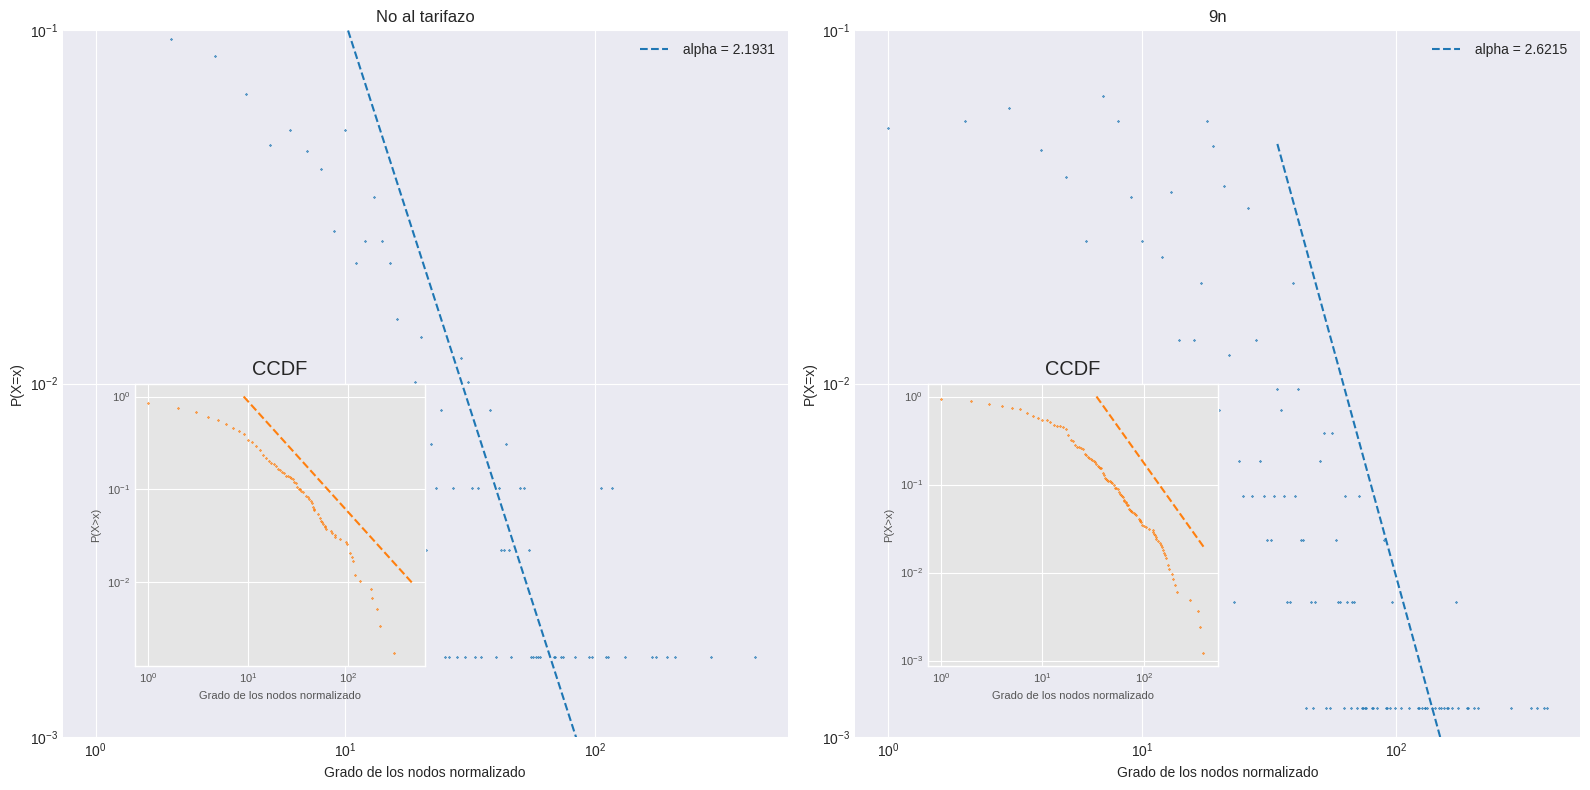

In [8]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=ax1, linestyle='--')
ax1.set_ylim(0.001, 0.1)

ax1.set_xlabel("Grado de los nodos normalizado")
ax1.set_ylabel("P(X=x)")
ax1.set_title("No al tarifazo")
ax1.legend()

with plt.style.context('ggplot'):
    ins_ax_nat = ax1.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos normalizado", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=ax2, linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
ax2.legend()
ax2.set_ylim(0.001, 0.1)

ax2.set_xlabel("Grado de los nodos normalizado")
ax2.set_ylabel("P(X=x)")
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = ax2.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos normalizado", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
plt.tight_layout()
plt.savefig("plots/PDF_CCDF_nodes_hashtag.png")
plt.show()

# AUTOSIMILITUD EN LAS REDES

## Grado medio por Kt

In [16]:
# MAX_UMBRAL es el máximo K_T que se va a usar para generar subgrafos
MAX_UMBRAL = 200

dict_hora_nat = {}
G_nat = nx.read_gexf(graphs_folder + "nodes_hashtag/nat/" + HORA_CRITICA_NAT + '.gexf')
arr_medium_deg = []
for threshold in tqdm(range(MAX_UMBRAL)):
    threshold = float(threshold)
    if not threshold in dict_hora_nat.keys():
        # Se crea el subgrafo basandose en el threshold seleccionado
        F = thresh_normalization(G_nat,  threshold)
        if F == -1:
            # Caso de grafo vacío o grafo inconexo
            break 
        dict_hora_nat[threshold] = calc_avg_degree(F)

dict_hora_9n = {}
G_9n = nx.read_gexf(graphs_folder + "nodes_hashtag/9n/" + HORA_CRITICA_9N + '.gexf')
arr_medium_deg = []
for threshold in tqdm(range(MAX_UMBRAL)):
    threshold = float(threshold)
    if not threshold in dict_hora_9n.keys():
        # Se crea el subgrafo basándonos en el threshold seleccionado
        F = thresh_normalization(G_9n,  threshold)
        if F == -1:
            # Caso de grafo vacío o grafo inconexo
            break 
        dict_hora_9n[threshold] = calc_avg_degree(F)

100%|██████████| 200/200 [00:01<00:00, 105.12it/s]


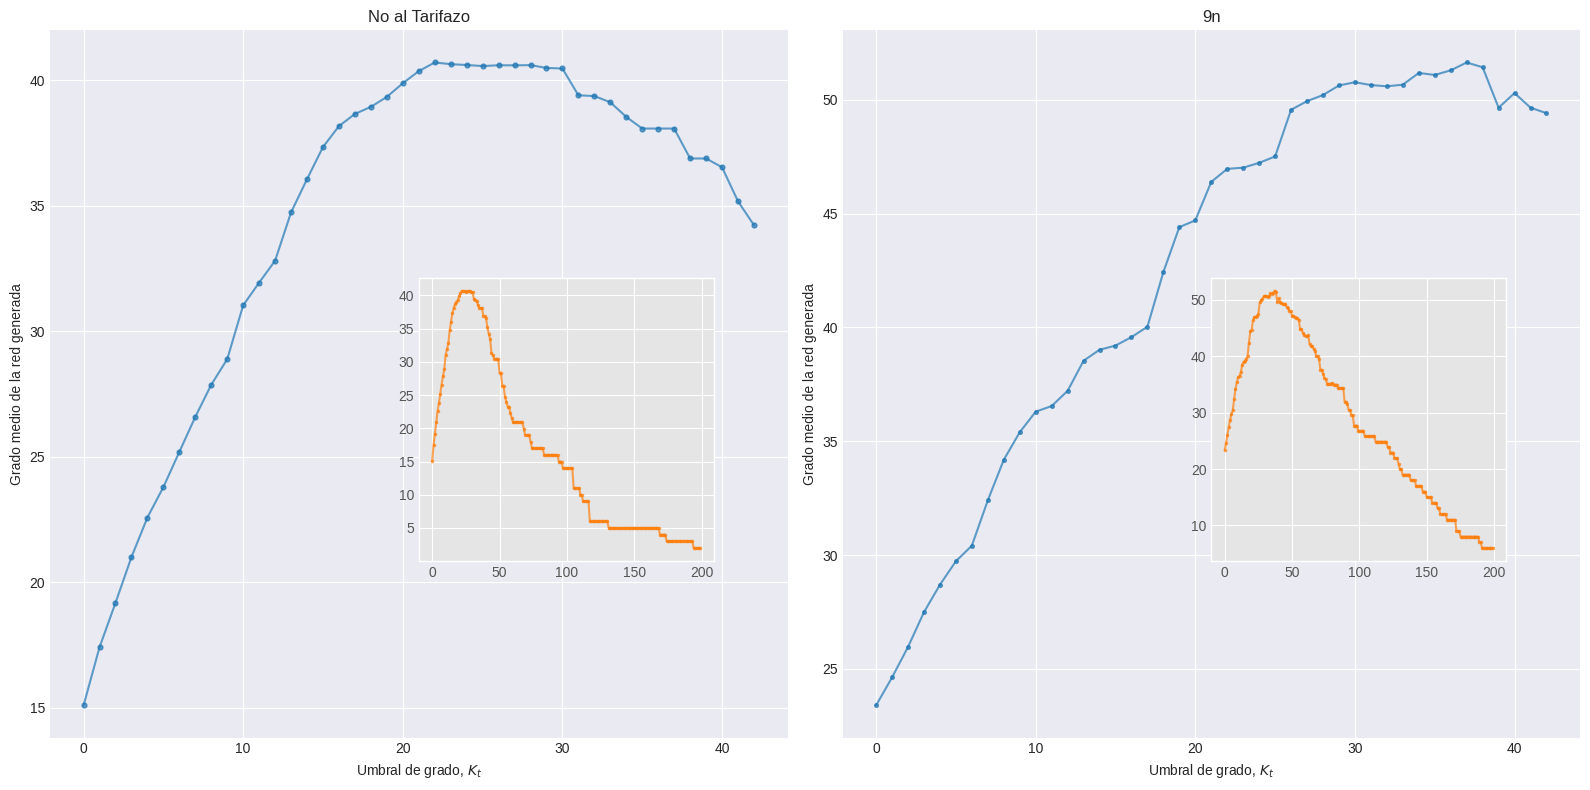

In [17]:
plt.style.use('seaborn-v0_8-darkgrid')

alpha=0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

ax1.plot(list(dict_hora_nat.keys())[0:43], list(dict_hora_nat.values())[0:43], alpha=0.7)
ax1.scatter(list(dict_hora_nat.keys())[0:43], list(dict_hora_nat.values())[0:43], s=12, alpha=alpha)
ax1.set_title("No al Tarifazo")

with plt.style.context('ggplot'):
    ax1_inset = ax1.inset_axes([0.5, 0.25, 0.4, 0.4])
    #ax1_inset = inset_axes(ax1, width="40%", height="40%", loc="center right")  # Dimensiones y ubicación del inset
    ax1_inset.plot(list(dict_hora_nat.keys()), list(dict_hora_nat.values()), alpha=0.7, c='#ff7f0e')
    ax1_inset.scatter(list(dict_hora_nat.keys()), list(dict_hora_nat.values()), s=4, alpha=alpha, c='#ff7f0e')

ax2.plot(list(dict_hora_9n.keys())[0:43], list(dict_hora_9n.values())[0:43], alpha=alpha)
ax2.scatter(list(dict_hora_9n.keys())[0:43], list(dict_hora_9n.values())[0:43], s=7, alpha=alpha)
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ax2_inset = ax2.inset_axes([0.5, 0.25, 0.4, 0.4])
    #ax2_inset = inset_axes(ax2, width="40%", height="40%", loc="center right")  # Dimensiones y ubicación del inset
    ax2_inset.plot(list(dict_hora_9n.keys()), list(dict_hora_9n.values()), alpha=alpha, c='#ff7f0e')
    ax2_inset.scatter(list(dict_hora_9n.keys()), list(dict_hora_9n.values()), s=4, alpha=alpha, c='#ff7f0e')
    ax2_inset.get_xaxis().set_visible(True)

ax1.set_ylabel("Grado medio de la red generada")
ax1.set_xlabel("Umbral de grado, $K_t$")
ax2.set_ylabel("Grado medio de la red generada")
ax2.set_xlabel("Umbral de grado, $K_t$")

plt.tight_layout()
plt.savefig(plots_folder + "avg_deg.png")
plt.show()

## Autosimilitud

In [18]:
# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 500

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_thres_avg_clust_nat_h, dict_norm_int_deg_nat_h = calc_self_sim(HORA_CRITICA_NAT, MAX_UMBRAL, "nat/")
dict_thres_avg_clust_9n_h, dict_norm_int_deg_9n_h = calc_self_sim(HORA_CRITICA_9N, MAX_UMBRAL, "9n/")

 76%|███████▌  | 379/500 [00:05<00:01, 71.38it/s]


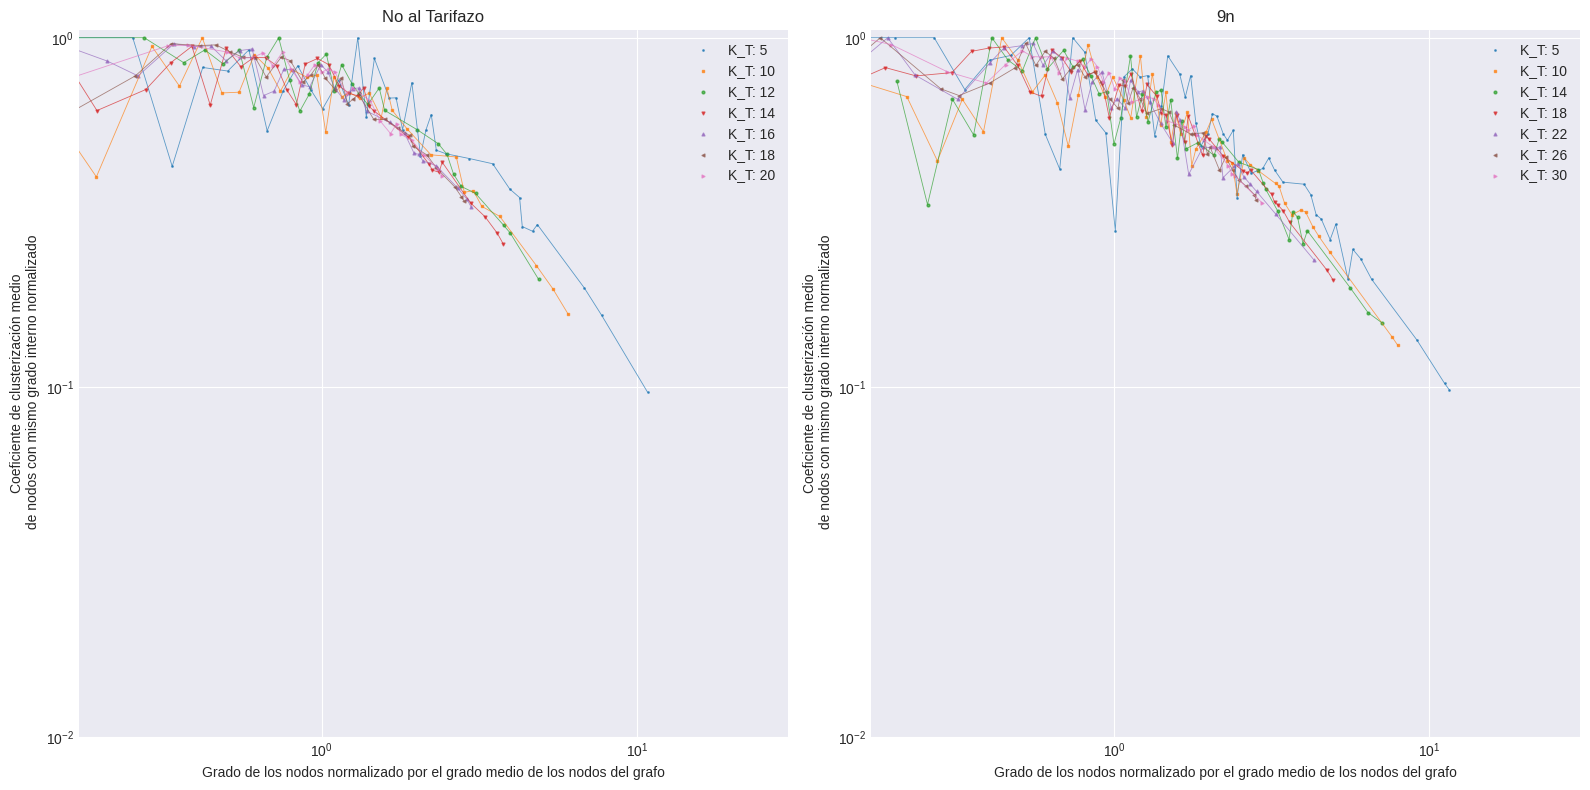

In [19]:
plt.style.use('seaborn-v0_8-darkgrid')

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)

# Los valores de Kt que se van a representar
arr_kt_plot_nat = [5,10,12,14,16,18,20]
arr_kt_plot_9n = [5,10,14,18,22,26,30]

markers = get_all_markers()
alpha = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 


for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_nat_h.keys():
        points_x = list(dict_norm_int_deg_nat_h[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_nat_h[kt].values())[::2]
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.17, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_9n_h.keys():
        points_x = list(dict_norm_int_deg_9n_h[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_9n_h[kt].values())[::2]
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.17, 30)
ax2.legend()
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "self_similarity.png")
plt.show()

## Clustering promedio

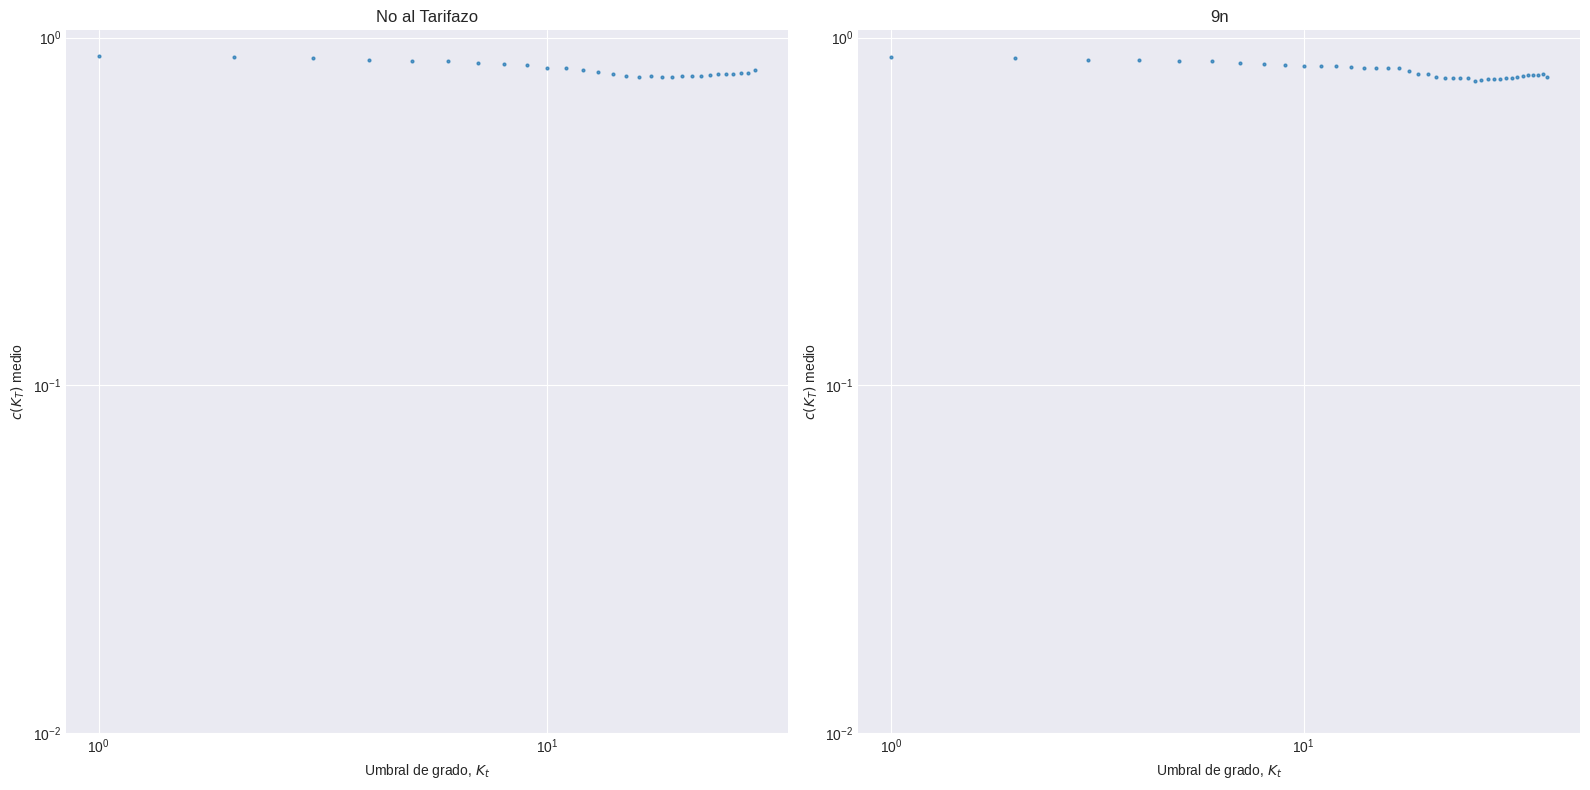

In [20]:
plt.style.use('seaborn-v0_8-darkgrid')

# Máximos valores de Kt identificados para uqe no se observen errores de tamaño finito
supreme_nat = 30
supreme_9n = 40

markers = get_all_markers()
alpha = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_thres_avg_clust_nat_h.keys())[:supreme_nat]
clust_nat = list(dict_thres_avg_clust_nat_h.values())[:supreme_nat]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("Umbral de grado, $K_t$")
ax1.set_ylabel("$c(K_T)$ medio")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_thres_avg_clust_9n_h.keys())[:supreme_9n]
clust_9n = list(dict_thres_avg_clust_9n_h.values())[:supreme_9n]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("Umbral de grado, $K_t$")
ax2.set_ylabel("$c(K_T)$ medio")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")


plt.tight_layout()
plt.savefig(plots_folder + "avg_clust_kt.png")
plt.show()

In [4]:
arr_kt_plot_nat = [10,12,14,15,16,18,20]
_, arr_deg_prob_nat, arr_deg_comp_cum_nat = calc_degree_distribution("429624", "nat/", mode="h", measures_folder=measures_folder, arr_kt=arr_kt_plot_nat, exp=False, norm=True)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)


arr_kt_plot_9n = [10,14,18,22,26,30]
_, arr_deg_prob_9n, arr_deg_comp_cum_9n = calc_degree_distribution("437037",  "9n/", mode="h", measures_folder=measures_folder, arr_kt=arr_kt_plot_9n, exp=False, norm=True)
#calc_yerali(hora, graphs_folder, plots_folder, plfit=True, normalize=False, show_comparative=False, only_ntamas=False)

100%|██████████| 6/6 [00:00<00:00, 14580.43it/s]


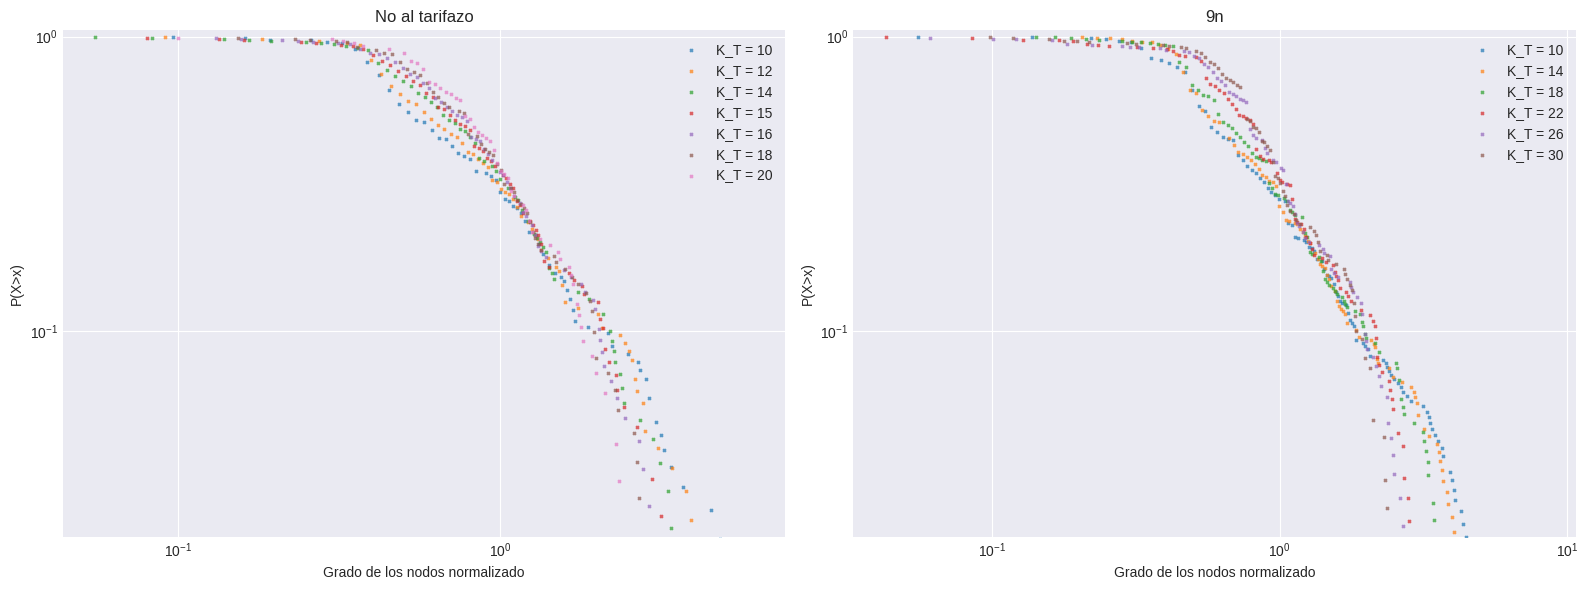

In [5]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,6)

dot_size=4
marker = "x"
alpha=0.7

for index, points in enumerate(arr_deg_comp_cum_nat):
    ax1.scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_nat[index]))
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(0.02, 1.05)
ax1.set_title("No al tarifazo")
ax1.set_xlabel("Grado de los nodos normalizado")
ax1.set_ylabel("P(X>x)")

for index, points in enumerate(arr_deg_comp_cum_9n):
    ax2.scatter(points[0], points[1], marker=marker, s=dot_size, alpha=alpha, label="K_T = " + str(arr_kt_plot_9n[index]))
ax2.legend()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim(0.02, 1.05)
ax2.set_title("9n")
ax2.set_xlabel("Grado de los nodos normalizado")
ax2.set_ylabel("P(X>x)")

plt.tight_layout()
plt.savefig(plots_folder + "PDF_CCDF_Kts.png")
plt.show()

## Resultados en otras ventanas temporales diferentes a la crítica

In [23]:

# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 500

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
otra_hora_nat = "429600"

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_thres_avg_clust_nat_h, dict_norm_int_deg_nat_h = calc_self_sim(otra_hora_nat, MAX_UMBRAL, "nat/")

otra_hora_9n = "437002"
dict_thres_avg_clust_9n_h, dict_norm_int_deg_9n_h = calc_self_sim(otra_hora_9n, MAX_UMBRAL, "9n/")

  0%|          | 0/500 [00:00<?, ?it/s]

 20%|█▉        | 99/500 [00:00<00:02, 164.24it/s]


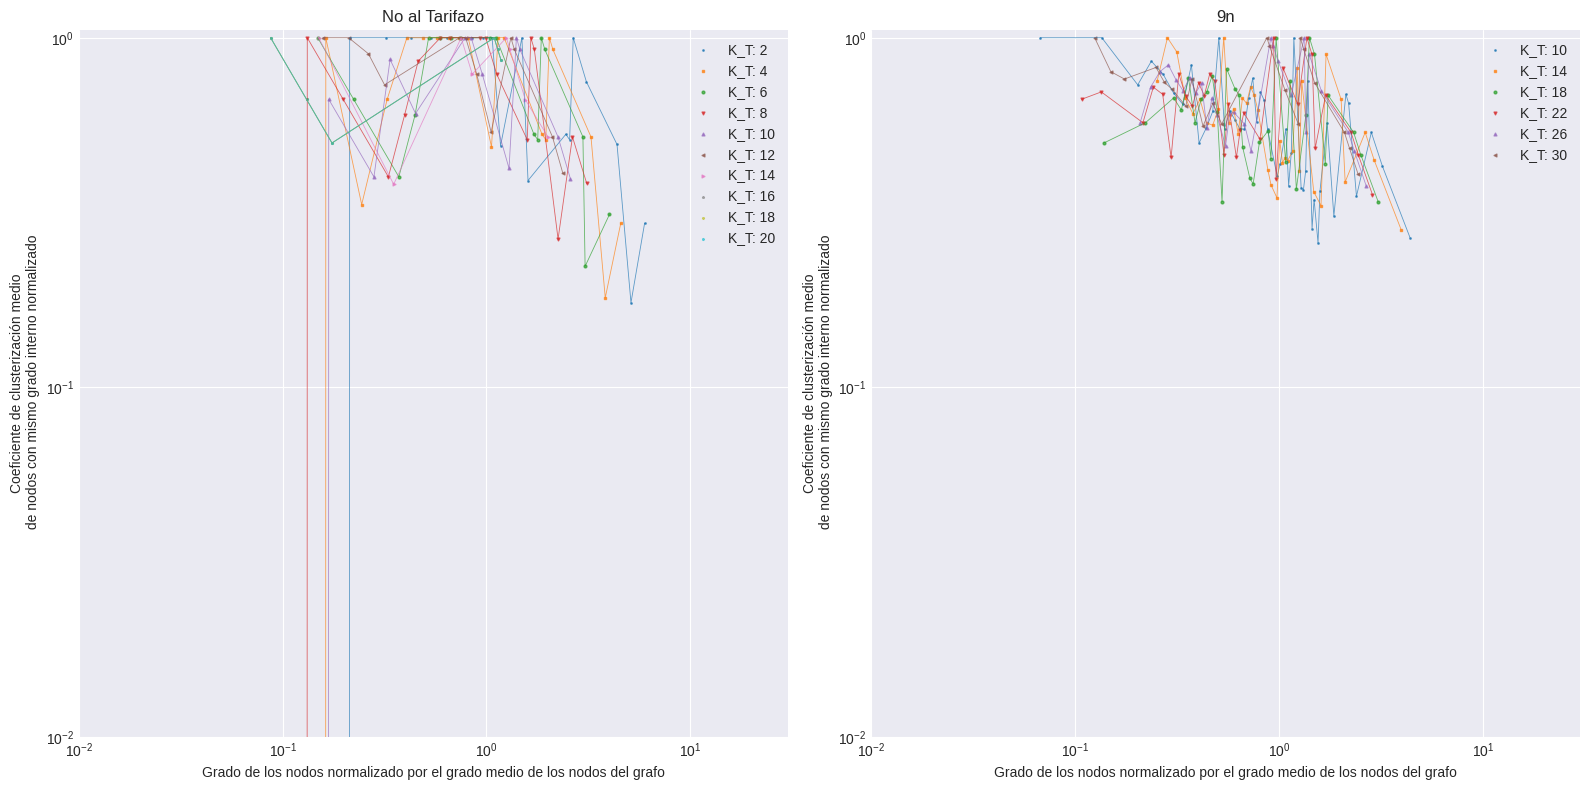

In [24]:
alpha = 0.7

arr_kt_plot_nat = [2,4,6,8,10,12,14,16,18,20]
arr_kt_plot_9n = [10,14,18,22,26,30]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_nat_h.keys():
        points_x = list(dict_norm_int_deg_nat_h[kt].keys())
        points_y = list(dict_norm_int_deg_nat_h[kt].values())
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.01, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_9n_h.keys():
        points_x = list(dict_norm_int_deg_9n_h[kt].keys())
        points_y = list(dict_norm_int_deg_9n_h[kt].values())
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.01, 30)
ax2.legend()
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "self_similairty_others.png")
plt.show()

## Uso de d-mercator

Los archivos de código relativos al uso de d-mercator se encuentran en la carpeta ```d-mercator/``` del presente repositorio.

### Ajuste a ley de potencia de los grafos filtrados

In [24]:
# CREACIÓN DE LOS GRAFOS FILTRADOS

umbral_nat = 5
umbral_9n = 5
# No al tarifazo
G = nx.read_gexf(graphs_folder + "nodes_hashtag/nat/" + HORA_CRITICA_NAT + ".gexf")
G = create_filtered_graph(G, umbral_nat)

# Componente gigante del grafo
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

nx.write_gexf(G, graphs_folder + "filtered/" + str(umbral_nat) + '/nat/' + HORA_CRITICA_NAT + ".gexf")

# 9n
G = nx.read_gexf(graphs_folder + "nodes_hashtag/9n/" + HORA_CRITICA_9N + ".gexf")

G = create_filtered_graph(G, umbral_9n)

# Componente gigante del grafo
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

nx.write_gexf(G, graphs_folder + "filtered/" + str(umbral_9n) + '/9n/' + HORA_CRITICA_9N + ".gexf")


642 403
84 403
870 680
106 675


In [18]:
#No al tarifazo
plfit_nat, arr_pdf_points_nat, arr_ccdf_points_nat = calc_degree_distribution(HORA_CRITICA_NAT, "nat/", mode="f", graphs_folder=graphs_folder, measures_folder=measures_folder, exp=True, thresh_filt=umbral_nat)

# 9n
plfit_9n, arr_pdf_points_9n, arr_ccdf_points_9n = calc_degree_distribution(HORA_CRITICA_9N, "9n/", mode="f", graphs_folder=graphs_folder, measures_folder=measures_folder, exp=True, thresh_filt=umbral_9n)

100%|██████████| 1/1 [00:00<00:00, 16131.94it/s]

Calculating best minimal value for power law fit


100%|██████████| 1/1 [00:00<00:00, 13148.29it/s]

Calculating best minimal value for power law fit


In [23]:
plfit_9n.D

np.float64(0.12685426675387346)

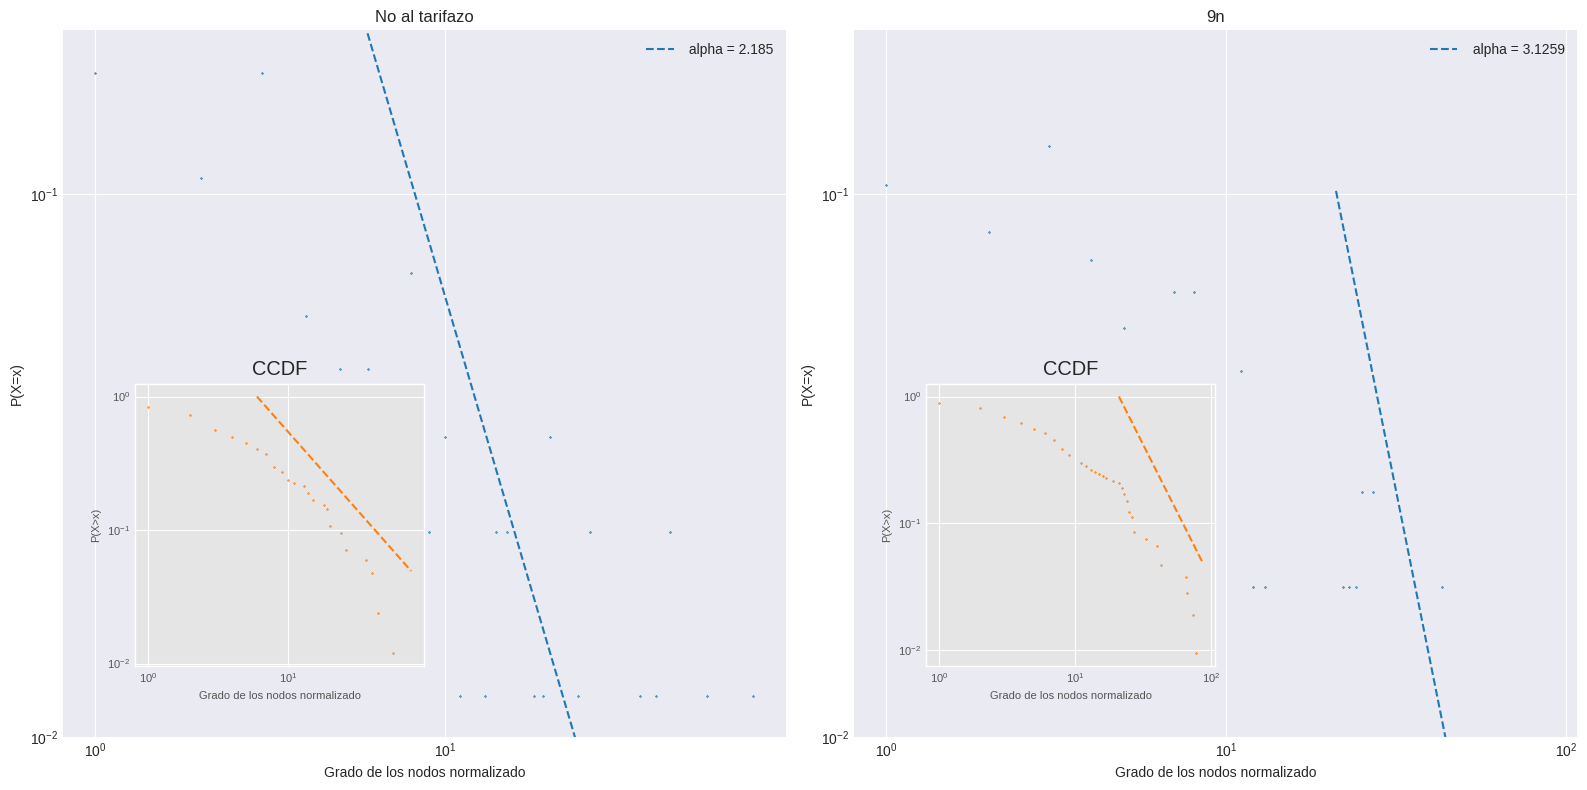

In [19]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=ax1, linestyle='--')
ax1.set_ylim(0.01, 0.2)

ax1.set_xlabel("Grado de los nodos normalizado")
ax1.set_ylabel("P(X=x)")
ax1.set_title("No al tarifazo")
ax1.legend()

with plt.style.context('ggplot'):
    ins_ax_nat = ax1.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos normalizado", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=ax2, linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
ax2.legend()
ax2.set_ylim(0.01, 0.2)

ax2.set_xlabel("Grado de los nodos normalizado")
ax2.set_ylabel("P(X=x)")
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = ax2.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos normalizado", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
plt.tight_layout()
plt.savefig("plots/PDF_CCDF_filtered.png")
plt.show()

### Autosimilitud de redes filtradas

In [5]:
# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 500

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_thres_avg_clust_nat_h, dict_norm_int_deg_nat_h = calc_self_sim(HORA_CRITICA_NAT, MAX_UMBRAL, "nat/", mode="f", thresh_filter=umbral_nat)
dict_thres_avg_clust_9n_h, dict_norm_int_deg_9n_h = calc_self_sim(HORA_CRITICA_9N, MAX_UMBRAL, "9n/", mode="f", thresh_filter=umbral_9n)

  0%|          | 0/500 [00:00<?, ?it/s]

 16%|█▌        | 78/500 [00:00<00:01, 283.52it/s]


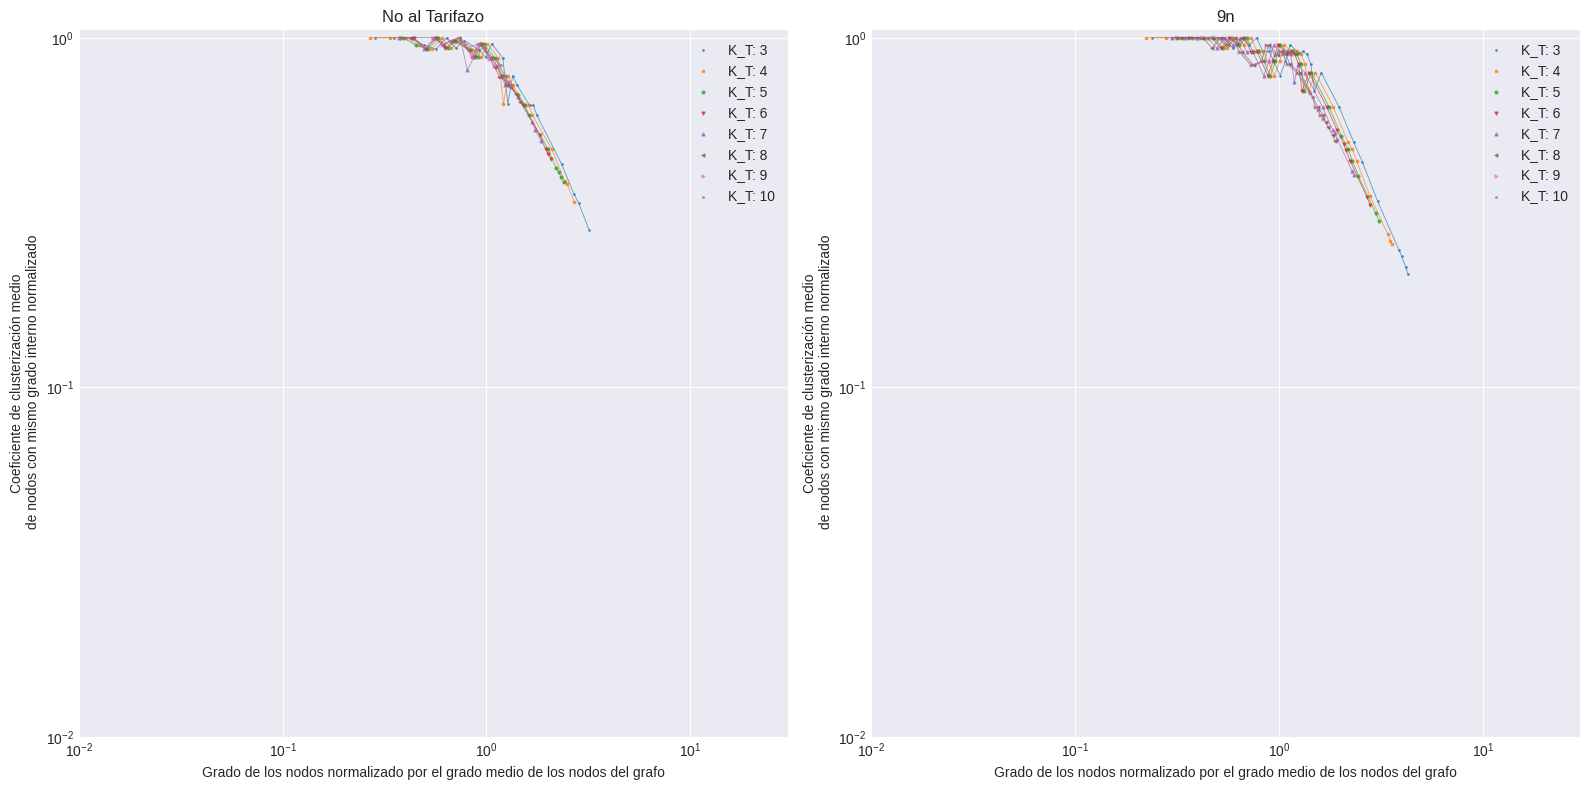

In [10]:
alpha = 0.7

arr_kt_plot_nat = [3,4,5,6,7,8,9,10]
arr_kt_plot_9n = [3,4,5,6,7,8,9,10]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_nat_h.keys():
        points_x = list(dict_norm_int_deg_nat_h[kt].keys())
        points_y = list(dict_norm_int_deg_nat_h[kt].values())
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.01, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_9n_h.keys():
        points_x = list(dict_norm_int_deg_9n_h[kt].keys())
        points_y = list(dict_norm_int_deg_9n_h[kt].values())
        # Se quita el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_h[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grado de los nodos normalizado por el grado medio de los nodos del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.01, 30)
ax2.legend()
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "self_similairty_filtered.png")
plt.show()

# Resultados en redes formadas con diferentes estrategias

## Usuarios como nodos de los grafos

### Ajuste a ley de potencia

In [6]:
#No al tarifazo
plfit_nat, arr_pdf_points_nat, arr_ccdf_points_nat = calc_degree_distribution(HORA_CRITICA_NAT, "nat/", mode="u", graphs_folder=graphs_folder, measures_folder=measures_folder, exp = True, norm=False)

# 9n
plfit_9n, arr_pdf_points_9n, arr_ccdf_points_9n = calc_degree_distribution(HORA_CRITICA_9N, "9n/", mode="u", graphs_folder=graphs_folder, measures_folder=measures_folder, exp = True, norm=False)

100%|██████████| 1/1 [00:00<00:00, 12446.01it/s]


Calculating best minimal value for power law fit


100%|██████████| 1/1 [00:00<00:00, 12018.06it/s]


Calculating best minimal value for power law fit


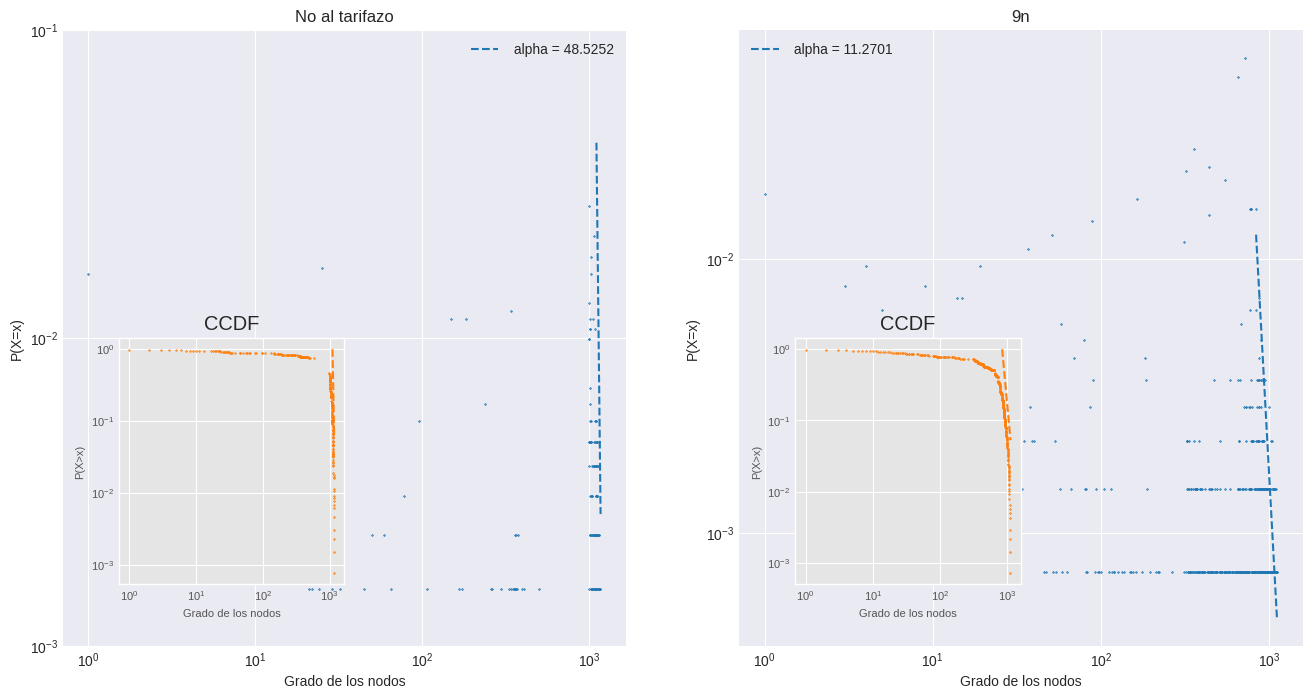

In [7]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=ax1, linestyle='--')
ax1.set_ylim(0.001, 0.1)

ax1.set_xlabel("Grado de los nodos")
ax1.set_ylabel("P(X=x)")
ax1.set_title("No al tarifazo")
ax1.legend()

with plt.style.context('ggplot'):
    ins_ax_nat = ax1.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    
ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=ax2, linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
ax2.legend()

ax2.set_xlabel("Grado de los nodos")
ax2.set_ylabel("P(X=x)")
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = ax2.inset_axes([0.1, 0.1, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')

plt.tight_layout
plt.savefig("plots/PDF_CCDF_nodes_user.png")
plt.show()

### Autosimilitud

In [ ]:
# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_thres_avg_clust_nat_u, dict_norm_int_deg_nat_u = calc_self_sim(HORA_CRITICA_NAT, MAX_UMBRAL, "nat/", mode='u')
dict_thres_avg_clust_9n_u, dict_norm_int_deg_9n_u = calc_self_sim(HORA_CRITICA_9N, MAX_UMBRAL, "9n/", mode='u')

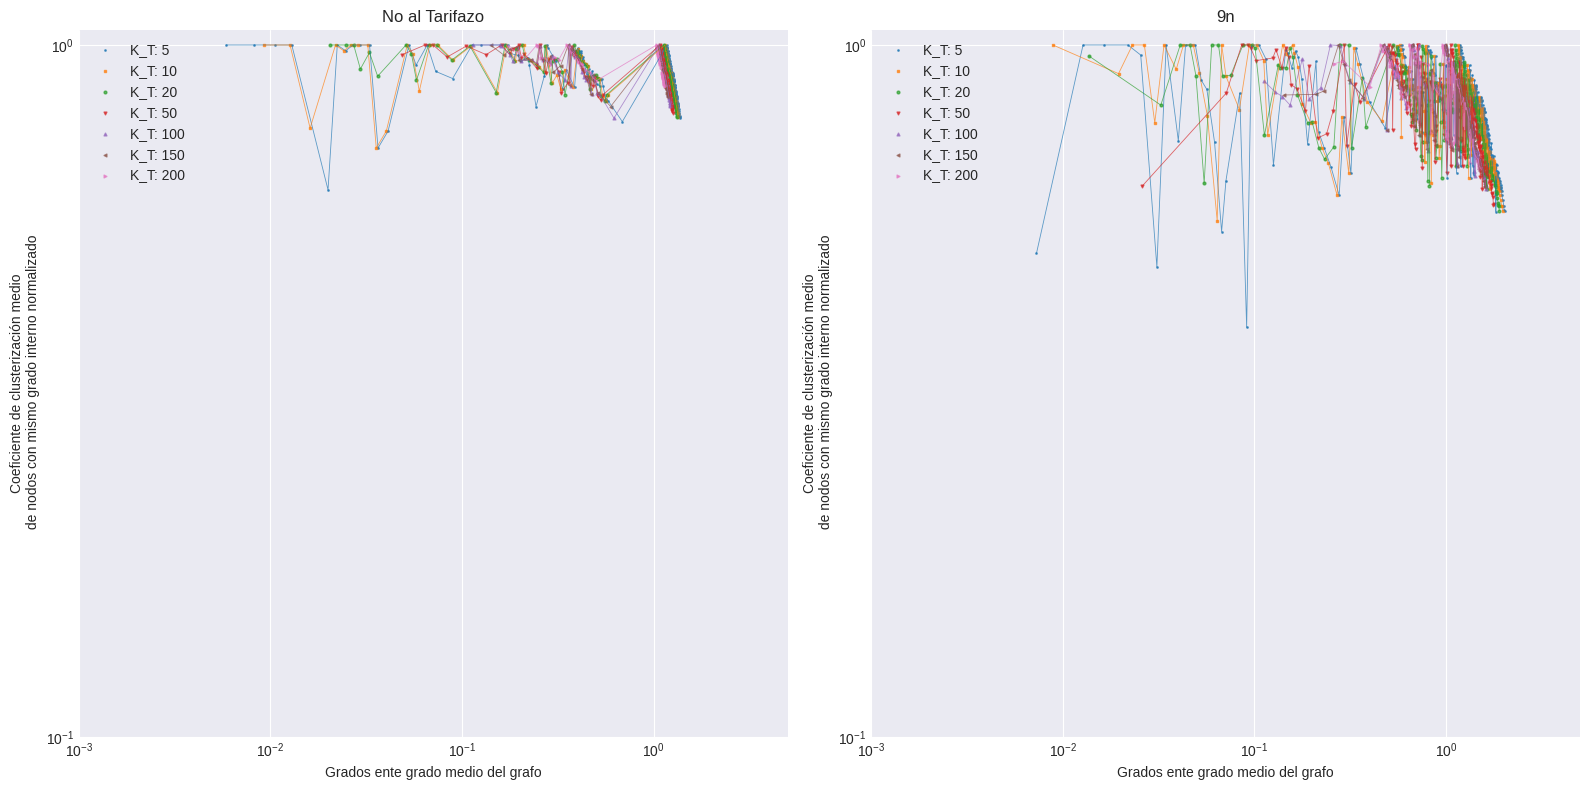

In [ ]:
alpha = 0.7

arr_kt_plot_nat = [5,10,20,50,100,150,200,250,300,350]
arr_kt_plot_9n = [5,10,20,50,100,150,200,250,300,350]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)

markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_nat_u.keys():
        points_x = list(dict_norm_int_deg_nat_u[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_nat_u[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_u[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grados ente grado medio del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.1, 1.05)
ax1.set_xlim(0.001, 5)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_9n_u.keys():
        points_x = list(dict_norm_int_deg_9n_u[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_9n_u[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_u[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grados ente grado medio del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.1, 1.05)
ax2.set_xlim(0.001, 5)
ax2.legend()
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "self_similarity_nodes_user.png")
plt.show()

### Clustering promedio

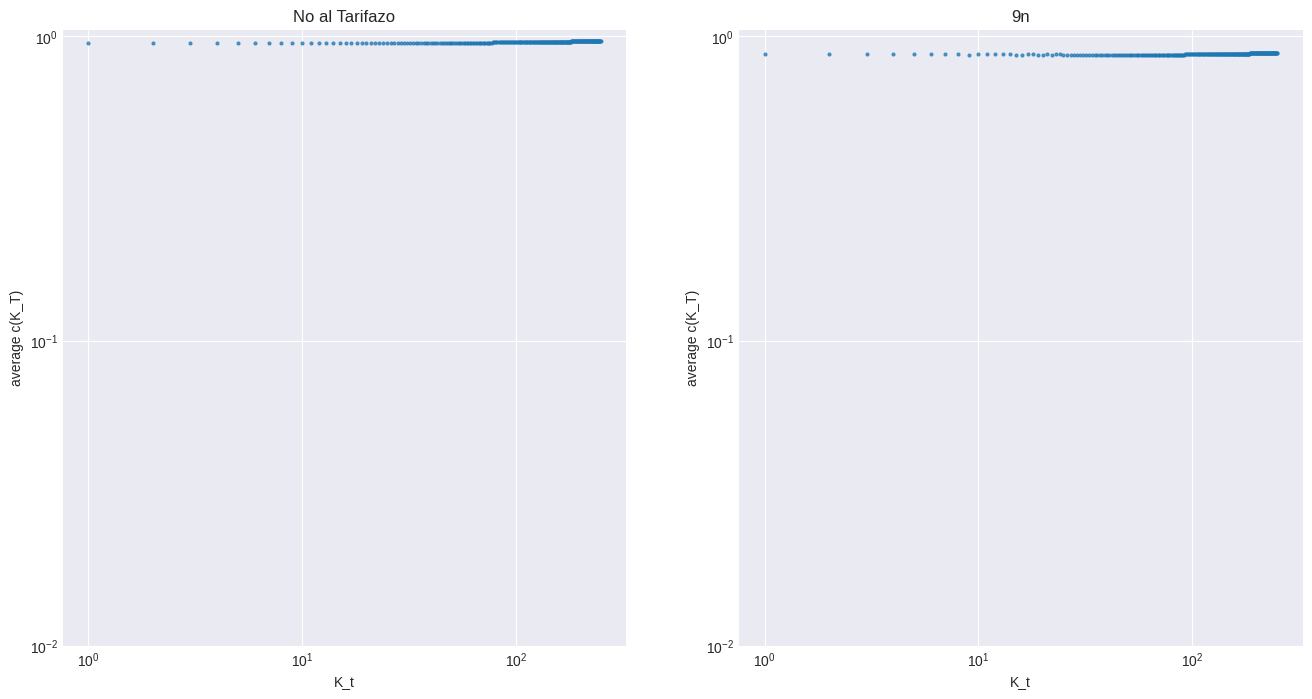

<Figure size 1400x700 with 0 Axes>

In [ ]:
alpha = 0.7

arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25,30,35,40]

markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_thres_avg_clust_nat_u.keys())[:MAX_UMBRAL]
clust_nat = list(dict_thres_avg_clust_nat_u.values())[:MAX_UMBRAL]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_thres_avg_clust_9n_u.keys())[:MAX_UMBRAL]
clust_9n = list(dict_thres_avg_clust_9n_u.values())[:MAX_UMBRAL]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")


plt.tight_layout()
plt.savefig(plots_folder + "avg_clust_kt_nodes_user.png")
plt.show()

## Redes bipartitas

### Ajuste a ley de potencia

In [9]:
#No al tarifazo
plfit_nat, arr_pdf_points_nat, arr_ccdf_points_nat = calc_degree_distribution(HORA_CRITICA_NAT, "nat/", mode="b", graphs_folder=graphs_folder, measures_folder=measures_folder, exp = True, norm=False)

# 9n
plfit_9n, arr_pdf_points_9n, arr_ccdf_points_9n = calc_degree_distribution(HORA_CRITICA_9N, "9n/", mode="b", graphs_folder=graphs_folder, measures_folder=measures_folder, exp = True, norm=False)

100%|██████████| 1/1 [00:00<00:00, 7133.17it/s]


Calculating best minimal value for power law fit


100%|██████████| 1/1 [00:00<00:00, 11983.73it/s]

Calculating best minimal value for power law fit


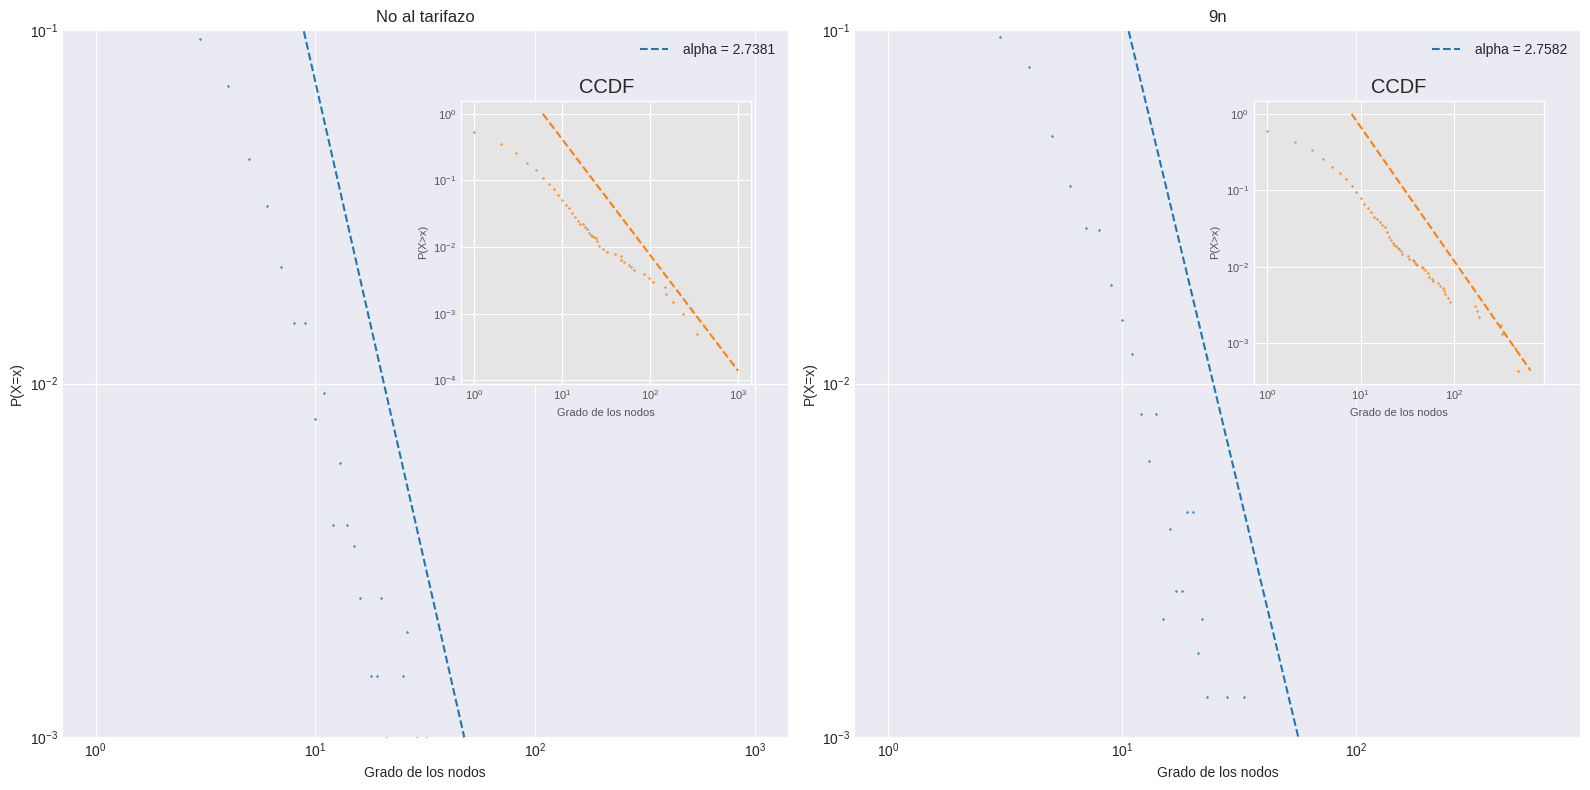

In [13]:
plt.style.use('seaborn-v0_8-darkgrid')    

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.scatter(arr_pdf_points_nat[0][0], arr_pdf_points_nat[0][1], marker="x", s=1, alpha=0.7)
plfit_nat.power_law.plot_pdf(label=" alpha = " + str(round(plfit_nat.alpha, 4)), ax=ax1, linestyle='--')
ax1.set_ylim(0.001, 0.1)

ax1.set_xlabel("Grado de los nodos")
ax1.set_ylabel("P(X=x)")
ax1.set_title("No al tarifazo")
ax1.legend()

with plt.style.context('ggplot'):
    ins_ax_nat = ax1.inset_axes([0.55, 0.5, 0.4, 0.4])
    ins_ax_nat.set_xscale('log')
    ins_ax_nat.set_yscale('log')

    ins_ax_nat.scatter(arr_ccdf_points_nat[0][0], arr_ccdf_points_nat[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_nat.set_title("CCDF")
    ins_ax_nat.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_nat.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_nat.tick_params(labelsize=8)

    plfit_nat.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_nat.alpha, 5)), ax=ins_ax_nat, linestyle='--', c='#ff7f0e')
    

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.scatter(arr_pdf_points_9n[0][0], arr_pdf_points_9n[0][1], marker="x", s=1, alpha=0.7)
plfit_9n.power_law.plot_pdf(label=" alpha = " + str(round(plfit_9n.alpha, 4)), ax=ax2, linestyle='--')
#plfit.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit.alpha, 5)), color='red')
ax2.legend()
ax2.set_ylim(0.001, 0.1)

ax2.set_xlabel("Grado de los nodos")
ax2.set_ylabel("P(X=x)")
ax2.set_title("9n")

with plt.style.context('ggplot'):
    ins_ax_9n = ax2.inset_axes([0.55, 0.5, 0.4, 0.4])
    ins_ax_9n.set_xscale('log')
    ins_ax_9n.set_yscale('log')

    ins_ax_9n.scatter(arr_ccdf_points_9n[0][0], arr_ccdf_points_9n[0][1], marker="x", s=1, alpha=0.7, c='#ff7f0e')
    ins_ax_9n.set_title("CCDF")
    ins_ax_9n.set_xlabel("Grado de los nodos", fontsize=8)
    ins_ax_9n.set_ylabel("P(X>x)", fontsize=8)
    ins_ax_9n.tick_params(labelsize=8)

    plfit_9n.power_law.plot_ccdf(label="powerlaw, alpha = " + str(round(plfit_9n.alpha, 5)), ax=ins_ax_9n, linestyle='--', c='#ff7f0e')
    

plt.tight_layout()
plt.savefig("plots/PDF_CCDF_nodes_bipartite.png")
plt.show()

### Autosimilitud

In [ ]:
# MAX_UMBRAL es el máximo K_T que vamos a usar para generar subgrafos
MAX_UMBRAL = 250

# Seleccionamos el fichero correspondiente a la manifestación social de la que queremos sacar la red y seleccionamos la hora que queremos estudiar
dict_thres_avg_clust_nat_b, dict_norm_int_deg_nat_b = calc_self_sim(HORA_CRITICA_NAT, MAX_UMBRAL, "nat/", mode='b')
dict_thres_avg_clust_9n_b, dict_norm_int_deg_9n_b = calc_self_sim(HORA_CRITICA_9N, MAX_UMBRAL, "9n/", mode='b')

 16%|█▌        | 40/250 [00:00<00:00, 394.50it/s]


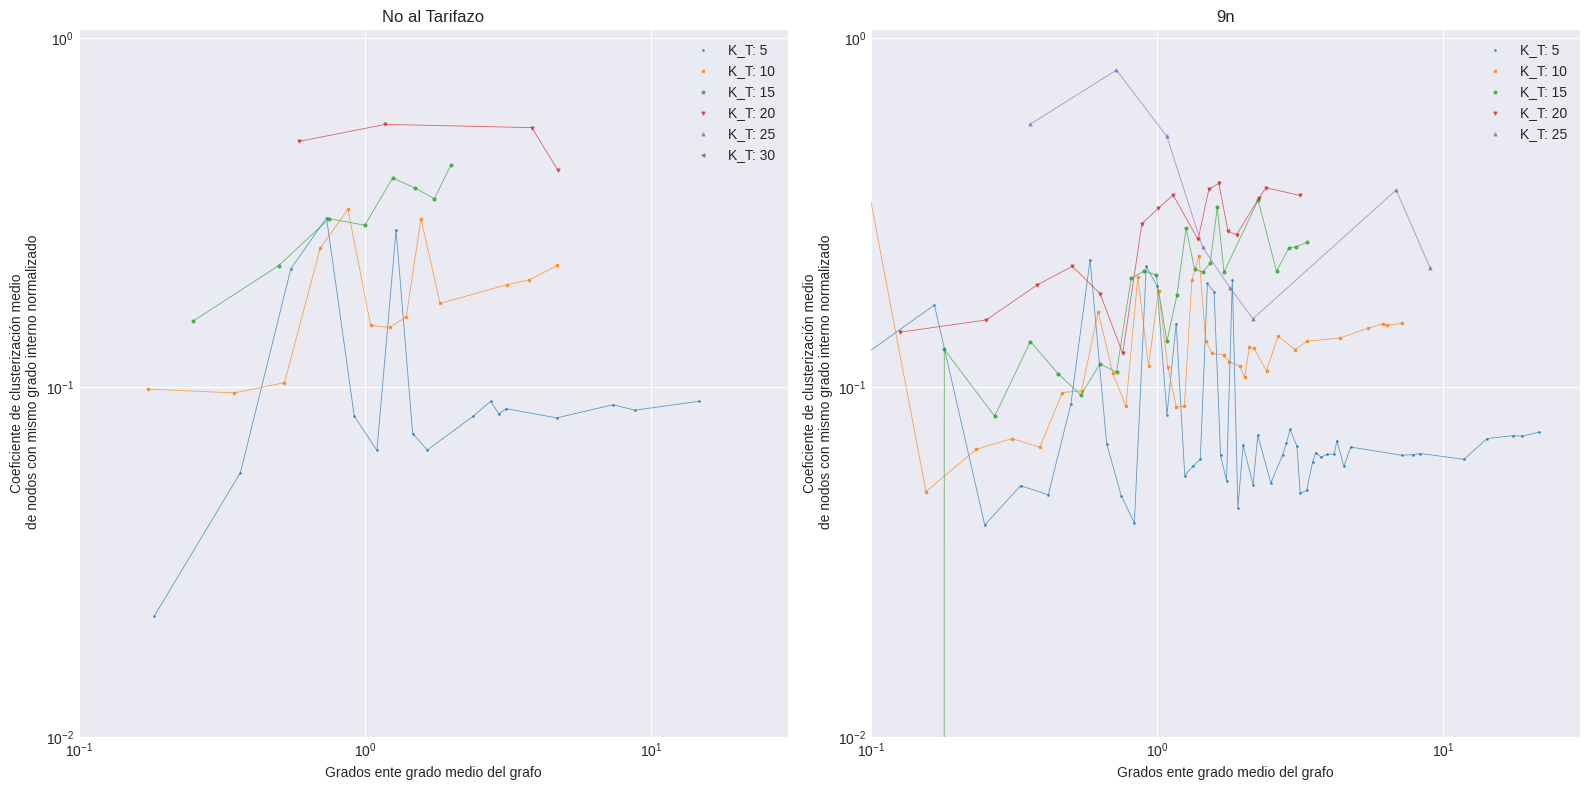

In [ ]:
alpha = 0.7
arr_kt_plot_nat = [5,10,15,20,25,30,35,40]
arr_kt_plot_9n = [5,10,15,20,25]

# Dado un diccionario con K_t como claves y como valores diccionarios con internal degrees como clave y la media de coeficiente de clusterización
# de los nodos que tienen dicho internal degree como valor, plotea el scatter con la clave en eje X y los valores en eje Y
# Plotea tantos tipos como elementos haya en arr_index(esos indices en concreto)


markers = get_all_markers()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.style.use('seaborn-v0_8-darkgrid')

for index, kt in enumerate(arr_kt_plot_nat):
    if kt in dict_norm_int_deg_nat_b.keys():
        points_x = list(dict_norm_int_deg_nat_b[kt].keys())[::2]
        points_y = list(dict_norm_int_deg_nat_b[kt].values())[::2]
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_b[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax1.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax1.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax1.set_xlabel("Grados ente grado medio del grafo")
ax1.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)
ax1.set_xlim(0.1, 30)
ax1.legend()
ax1.set_title("No al Tarifazo")

for index, kt in enumerate(arr_kt_plot_9n):
    if kt in dict_norm_int_deg_9n_b.keys():
        points_x = list(dict_norm_int_deg_9n_b[kt].keys())
        points_y = list(dict_norm_int_deg_9n_b[kt].values())
        # Quitamos el 0 para que la visualizacións se más clara
        if float(0) in dict_norm_int_deg_9n_b[kt].keys():
            points_x = points_x[1:]
            points_y = points_y[1:]
        ax2.plot(points_x, points_y, alpha=alpha, linewidth=0.6)
        ax2.scatter(points_x, points_y, alpha=alpha, s=4, marker=markers[index], label=f'K_T: {kt}')        

ax2.set_xlabel("Grados ente grado medio del grafo")
ax2.set_ylabel("Coeficiente de clusterización medio\n de nodos con mismo grado interno normalizado")
ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)
ax2.set_xlim(0.1, 30)
ax2.legend()
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "self_similarity_bipartite.png")
plt.show()

### Clustering promedio

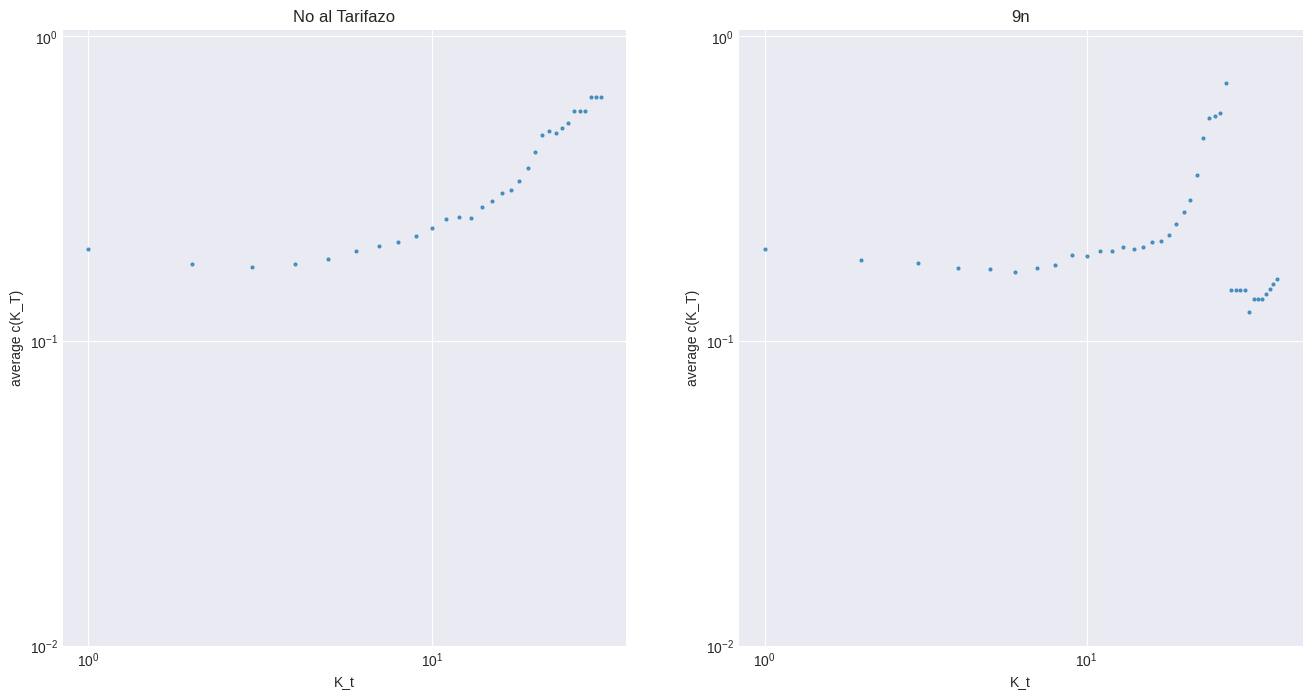

<Figure size 1400x700 with 0 Axes>

In [ ]:
alpha = 0.7

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,8) 

plt.styfig = plt.figure(figsize=(14,7)) 
plt.style.use('seaborn-v0_8-darkgrid')

ax1.set_xscale('log')  
ax1.set_yscale('log')      
ax1.set_ylim(0.01, 1.05)     

# Obtener las claves y los valores del diccionario
kt_nat = list(dict_thres_avg_clust_nat_b.keys())[:MAX_UMBRAL]
clust_nat = list(dict_thres_avg_clust_nat_b.values())[:MAX_UMBRAL]

ax1.scatter(kt_nat, clust_nat, s=4, alpha=alpha)

ax1.set_xlabel("K_t")
ax1.set_ylabel("average c(K_T)")
#ax1.legend(["max K_t posible: " + str(int(max(kt_nat)))])
ax1.set_title("No al Tarifazo")


ax2.set_xscale('log')  
ax2.set_yscale('log')      
ax2.set_ylim(0.01, 1.05)     


# Obtener las claves y los valores del diccionario
kt_9n = list(dict_thres_avg_clust_9n_b.keys())[:MAX_UMBRAL]
clust_9n = list(dict_thres_avg_clust_9n_b.values())[:MAX_UMBRAL]

ax2.scatter(kt_9n, clust_9n, s=4, alpha=alpha)

ax2.set_xlabel("K_t")
ax2.set_ylabel("average c(K_T)")
#ax2.legend(["max K_t posible: " + str(int(max(kt_9n)))])
ax2.set_title("9n")

plt.tight_layout()
plt.savefig(plots_folder + "avg_clust_kt_bipartite.png")
plt.show()